## Week I Demo: Linear regression and Gradient descent 

Today, we will see how to solve the linear regression problem through gradient descent and through the Normal Equations. The first approach corresponds to moving in the direction opposite to the gradient until reaching the lowest point of the function. 

<img src="gradientDescent.png",width=300>

([source](https://lucidar.me/en/neural-networks/single-layer-gradient-descent/))

This idea is illustrated in 1D on the figure above. At each step, we compute the gradient and take a move in the -grad direction. The procedure is repeated until the algorithm finds a point where the derivatives are zero.

The second approach consists in looking directly for the minimum by setting the derivatives to zero and looking for the value of $\beta_0$ and $\beta_1$ that solves the equation derivative = 0. 

Both of those procedures are illustrated below. 

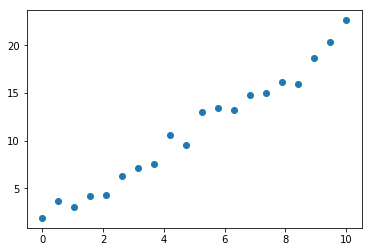

In [2]:
# As a start, we will generate data following a line y(x) = 2x + 1 and add some random noise on top of y(x)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 10, num=20)
y = 2*x + 1

epsilon = np.random.normal(0, 1, 20)

ynoisy = y + epsilon

plt.scatter(x, ynoisy)
plt.show()

# As you see below although the line is visible, the noise makes the problem a little more challenging. 
# It is now impossible to find a line that goes exactly through the points We will thus minimize the sum of 
# the squared residuals
#
#
# min_{\beta} (1/N) * sum_{i=1}^N |t^{(i)} - (beta^T x^{(i)} + beta0)|^2 (*)


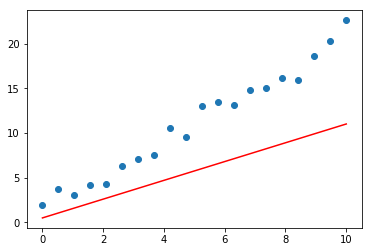

In [4]:
# We start with a random vector  

beta = np.random.normal(0, 1, (2,))
numPoints = np.shape(x)[0]

plt.scatter(x,ynoisy)
plt.plot(x, beta[0]+beta[1]*x, 'r-')
plt.show()


### Batch gradient descent

In [32]:
# To 

# In linear regression the objective is convex which basically means that we can start anywhere in the space and 
# move in the direction of the slope of the function in order to reach its minimum. This is the idea implemented 
# by the gradient descent iterations. Since we only have two parameters, the gradient of the OLS objective with 
# respect to beta_1 and beta_0 above reads very simply as 
#
# grad_{beta_0} f = (2/N)*sum_{i=1}^N (t^i - (beta_1 x^i + beta_0))
# grad_{beta_1} f = (2/N)*sum_{i=1}^N (t^i - (beta_1 x^i + beta_0)) x^i
#
# the gradient points in the direction of the largest increase in the function. I.e. among all possible choices of 
# directions d, the increase f(x_0 + eta*d) is the largest if we take d = grad f. From this idea, we can thus 
# take the opposite direction, -grad f and iterate. Provided that we take sufficiently small steps, such moves thus 
# guarantee that value of the objective will decrease at each step. 
#
#
# The result for 20 iterations is diplayed below on top of the dataset

maxIter = 20 

k = 0
epsilon = 0.1
gradientNorm = 1
beta = np.random.normal(0, 1, (2,))

numPoints = np.shape(x)[0]
eta = .001

Xtilde = np.hstack((np.ones((len(x),1)),x.reshape(-1,1)))
np.shape(Xtilde)

loss = 0

while k<maxIter and gradientNorm>epsilon:
    
    grad1 = 0
    grad2 = 0
    
    
    for i in np.arange(numPoints):
        
        grad1 += beta[0] + beta[1]*x[i] - ynoisy[i]
        grad2 += (beta[0] + beta[1]*x[i] - ynoisy[i])*x[i]
        
        #print(i)
    
    gradientNorm = np.sqrt(grad1**2 + grad2**2)
    
    beta[0] -= eta*grad1
    beta[1] -= eta*grad2
    
    
    #print(beta[0])
    #print(beta[1])
    # storing the value of the loss throughout the iterations
    loss = np.hstack((loss, np.dot((np.dot(Xtilde, beta) - ynoisy), (np.dot(Xtilde, beta) - ynoisy))))
    
    k+=1
    
    #print(k)
    
 

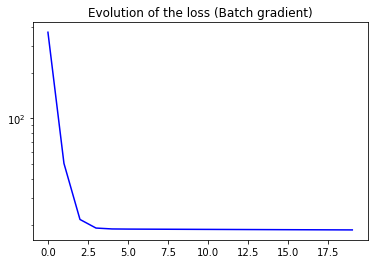

In [33]:
plt.semilogy(np.arange(0, maxIter), loss[1:], 'b-')
plt.title('Evolution of the loss (Batch gradient)')
plt.show()

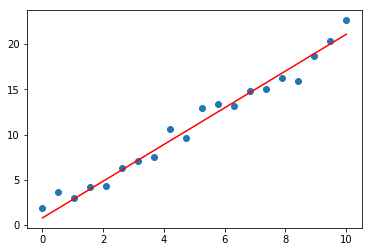

In [35]:
plt.scatter(x,ynoisy)
plt.plot(x, beta[0]+beta[1]*x, 'r-')
plt.show()

### Stochastic gradient descent 

In [36]:
# In batch gradient descent, we consider the whole set of pairs {x^(i), t^(i)}_{i=1}^N. When the size of the dataset 
# is sufficiently small, this approach is more interesting because it takes into account all the available information
# and moves straight in the direction of largest decrease. When the size of dataset increases, the procedure quickly 
# becomes memory expensive as it requires storing all computing the error for all the pairs in the dataset. 
# An alternative would be to use a subset (minibatch) of the whole set of pairs at each of the gradient steps. 
# The smaller the subset, the more approximate the direction of descent (in particular, for such an approach, we 
# cannot guarantee anymore that the function decreases at each step) but the faster the computations needed to complete 
# the step. Stochastic gradient descent corresponds to taking minibatches of size 1. We can then run through the whole 
# dataset iteratively several time (each complete run is called an epoch) until convergence

maxEpochs = 20 

k = 0
epsilon = 0.1
gradientNorm = 1
beta = np.random.normal(0, 1, (2,))

numPoints = np.shape(x)[0]
eta = .001


epochs = 0


loss = 0

while epochs<maxEpochs and gradientNorm>epsilon:
    
    # we run over the whole dataset
    
    grad1 = 0
    grad2 = 0
    
    for i in np.arange(numPoints):
        
        grad1 = beta[0] + beta[1]*x[i] - ynoisy[i]
        grad2 = (beta[0] + beta[1]*x[i] - ynoisy[i])*x[i]
        
        beta[0] -= eta*grad1
        beta[1] -= eta*grad2
        
        gradientNorm = np.sqrt(grad1**2 + grad2**2)
        
        loss = np.hstack((loss, np.dot((np.dot(Xtilde, beta) - ynoisy), (np.dot(Xtilde, beta) - ynoisy))))


    epochs+=1
    
    #print(k)
    




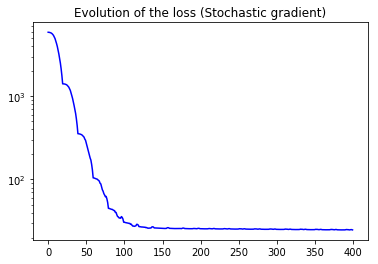

In [39]:
plt.semilogy(np.arange(0, maxEpochs*numPoints), loss[1:], 'b-')
plt.title('Evolution of the loss (Stochastic gradient)')
plt.show()

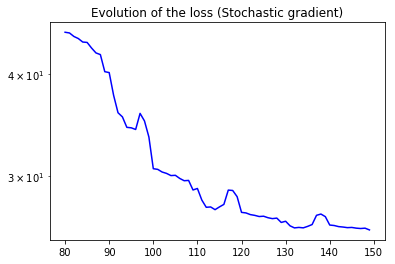

In [41]:
# Here the problem is simple, hence the SGD almost always takes decrease steps. However if 
# we zoom in on some of the steps, you can see that SGD sometimes increases the function

plt.semilogy(np.arange(80, 150), loss[80:150], 'b-')
plt.title('Evolution of the loss (Stochastic gradient)')
plt.show()


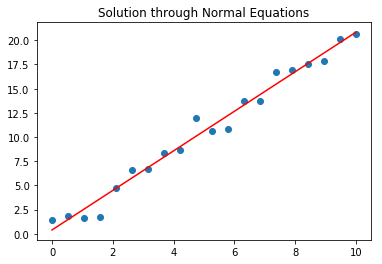

In [44]:
# As discussed above, gradient descent is an approach to tackle the regression problem. 
# Since we now that we are looking for the minimum, an alternative is to look for the point at which the partial 
# derivatives are zero. In this case, if you do the calculations, you should be able to show that the equations 
# corresponding to requiring the derivative to vanish correspond to setting each component of the gradient vector to 0
# We thus have (1/N)*sum(t^i - (beta0 + beta1*x^i)) x^i = 0 and (1/N)*sum(t^i - (beta0 + beta1*x^i))= 0. This can be 
# encoded compactly through the matrix equation


import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 10, num=20)
y = 2*x + 1

epsilon = np.random.normal(0, 1, 20)

ynoisy = y + epsilon


# As you see below although the line is visible, the noise makes the problem a little more challenging. 
# It is now impossible to find a line that goes exactly through the points We will thus minimize the sum of 
# the squared residuals
#
#
# min_{\beta} (1/N) * sum_{i=1}^N |t^{(i)} - (beta^T x^{(i)} + beta0)|^2 (*)

Xtilde = np.hstack((np.ones((len(x),1)),x.reshape(-1,1)))

# we want to minimize (X*beta - t)^T(X*beta - t) = beta^T*X^T * X * beta - beta^T*X^T*t - t^T*X*beta + t^T *t
# if we take the derivative of this function with respect to beta, we get 2 X^TX beta - 2X^T t = 0. Solving, we have 

solution_beta = np.dot(np.linalg.inv(np.dot(Xtilde.T, Xtilde)),np.dot(Xtilde.T, ynoisy))

# this is equivalent to the gradient descent steps followed above

plt.scatter(x,ynoisy)
plt.plot(x, solution_beta[0]+solution_beta[1]*x, 'r-')
plt.title('Solution through Normal Equations')
plt.show()
